# LAB-5

## Understanding SVD

In [45]:
import numpy as np
import random

def compute_svd(a):
    """
    Computes the Singular Value Decomposition of the input matrix.

    Parameters:
    matrix (ndarray): Input matrix to decompose

    Returns:
    U (ndarray): Left singular vectors
    S (ndarray): Singular values
    VT (ndarray): Right singular vectors (transposed)
    
    You may not use np.linalg.svd() for this. Use power iteration as discussed in class for this.  
    """

    at = a.transpose() # 2*3
    # U is made of eigen vectors of a*at and V made of at*a
    aat = np.dot(a,at)
    ata = np.dot(at,a)
    n = aat.shape[0]
    m = ata.shape[0]
    # making n<=m always
    x = min(n,m)
    U = np.zeros(shape = (n,x))
    S = np.zeros(shape = (x, x)) #made up of square roots of eigen values
    V = np.zeros(shape = (m,x))

    max_iter = 1000
    for i in range(x):
        x0 = np.random.rand(n)
        # power iteration
        for _ in range(max_iter):
            x1 =  np.dot(aat, x0)
            x0 =x1/np.linalg.norm(x1)
        U[:,i] = x0
        #x0 is the eigen vector obtained by power iteration
        # we want to find min(n,m) = x, number of eigen vectors to make the matrix U
        #Mx = lamb*x -> singular value is lamb
        lamb = np.dot(x0.transpose(), np.dot(aat,x0))
        S[i,i] = np.sqrt(lamb) if lamb>0 else 0
        aat =aat- lamb*np.outer(x0,x0)


    for i in range(x):
        x0 = np.random.rand(m)
        # power iteration
        for _ in range(max_iter):
            x1 =  np.dot(ata, x0)
            x0 =x1/np.linalg.norm(x1)
        V[:,i] = x0
        #x0 is the eigen vector obtained by power iteration
        ata =ata- S[i][i]**2 *np.outer(x0,x0)
                      
    return U, S, V.transpose()
    



    #return NotImplementedError


In [46]:
A = np.array([[1, 2], [3, 4], [5, 6]])

# Compute the SVD
U, S, VT = compute_svd(A)

# Print the results
print("U matrix:\n", U)
print("\nSingular values (S):\n", S)
print("\nV^T matrix:\n", VT)


U matrix:
 [[ 0.2298477   0.88346102]
 [ 0.52474482  0.24078249]
 [ 0.81964194 -0.40189603]]

Singular values (S):
 [[9.52551809 0.        ]
 [0.         0.51430058]]

V^T matrix:
 [[ 0.61962948  0.78489445]
 [ 0.78489445 -0.61962948]]


In [47]:
def reconstruct_matrix(U, S, VT):
    """
    Reconstructs the original matrix from its SVD components.

    Parameters:
    U (ndarray): Left singular vectors
    S (ndarray): Singular values
    VT (ndarray): Right singular vectors (transposed)

    Returns:
    ndarray: Reconstructed matrix
    """
    return np.dot(U, np.dot(S,VT))
    #return NotImplementedError


## Reconstruction from SVD

In [48]:
# Reconstruct the matrix
A_reconstructed = reconstruct_matrix(U, S, VT)

# Print the reconstructed matrix
print("Reconstructed matrix:\n", A_reconstructed)

# Verify reconstruction
print("\nOriginal matrix A:\n", A)


Reconstructed matrix:
 [[1.71325637 1.4369247 ]
 [3.19439414 3.84653689]
 [4.67553191 6.25614908]]

Original matrix A:
 [[1 2]
 [3 4]
 [5 6]]


Since SVD decomposition is lossless, we still get back the same matrix. Now we will load digit dataset and perform dimensionality reduction.

## Dimensionality Reduction using SVD

In [52]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.0 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.1/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.0 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.0 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.0 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/11.0 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.0 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.0 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/11.0 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.0 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 2.6 MB/s eta 0:00:04
   -


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Rishita\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
from sklearn.datasets import load_digits
# Load first 300 samples from digit dataset sklearn
digits = load_digits()
X = digits.data[:300]

In [54]:
def reduce_dimensions_via_svd(X, num_components=20):
    """
    Reduces the dimensionality of the dataset using SVD.

    Parameters:
    X (ndarray): Original dataset (n_samples, n_features)
    num_components (int): Number of singular values to retain

    Returns:
    X_reduced (ndarray): Dataset with reduced dimensions
    X_reconstructed (ndarray): Dataset reconstructed from reduced dimensions
    """

    U,S,VT = np.linalg.svd(X)
    S_reduced = np.diag(S[:num_components])
    X_reduced = U[:,:num_components]@S_reduced
    X_reconstructed = X_reduced@VT[:num_components,:]
    return X_reduced, X_reconstructed

    #return NotImplementedError

In [55]:
# Reduce dimensions and reconstruct
X_reduced, X_reconstructed = reduce_dimensions_via_svd(X, 20)

print("Shape of reduced dataset:", X_reduced.shape)
print("Shape of reconstructed dataset:", X_reconstructed.shape)

Shape of reduced dataset: (300, 20)
Shape of reconstructed dataset: (300, 64)


In [56]:
# Compute Mean squared error
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(X, X_reconstructed)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.4207210191244959


## Visualizing Dimensionality Reduction

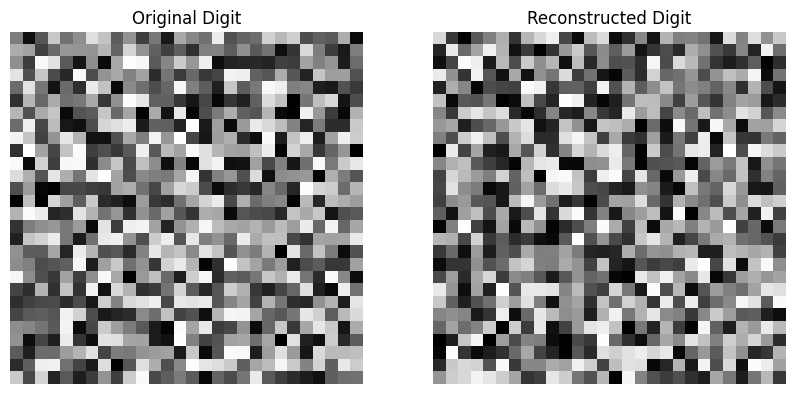

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_digits_comparison(original, reconstructed, index):
    """
    Plots the original and reconstructed digits side by side for comparison.

    Parameters:
    original (ndarray): Original dataset
    reconstructed (ndarray): Reconstructed dataset
    index (int): Index of the sample to plot
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with two subplots side by side

    # Plot original digit
    ax = axes[0]
    ax.imshow(original[index], cmap='gray')  # Assume original dataset images are 2D matrices
    ax.set_title('Original Digit')
    ax.axis('off')  # Turn off axis labels and ticks for clarity

    # Plot reconstructed digit
    ax = axes[1]
    ax.imshow(reconstructed[index], cmap='gray')  # Assume reconstructed dataset images are also 2D matrices
    ax.set_title('Reconstructed Digit')
    ax.axis('off')  # Turn off axis labels and ticks for clarity

    plt.show()

# Example usage:
# Assuming original and reconstructed are arrays of images where each image is a 2D array
# For example, using random data to simulate
original = np.random.rand(10, 28, 28)  # 10 images, 28x28 pixels each
reconstructed = np.random.rand(10, 28, 28)  # Simulated reconstructed images

plot_digits_comparison(original, reconstructed, 0)  # Plot the first image in the dataset


In [ ]:
# plot reconstruction loss
def plot_reconstruction_loss(X, svd_values):
    """
    Plots the reconstruction loss (MSE) for different numbers of singular values retained during SVD.

    Parameters:
    X (ndarray): Original dataset (n_samples, n_features)
    svd_values (list): List of singular values to test
    """
    return NotImplementedError
